In [80]:
# importing all the necessary library
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
# Reading the dataset into a dataframe alias df
df = pd.read_csv('NEISS2014.csv')


In [81]:
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narrative
0,141200216,10/23/14,63,99.704,M,21,Female,None listed,NaN,62,NaN,75,1,1,0,679,1807.0,21YOF LAYING ON THE COUCH AND ROLLED OFF TO TH...
1,140117851,1/4/14,63,81.576,M,62,Female,White,NaN,57,NaN,79,1,1,0,1807,115.0,62YOF TRIPPED OVER THE CORD FOR THE VACUUM CLE...
2,150144993,8/17/14,63,99.704,M,21,Female,None listed,NaN,57,NaN,83,1,0,0,1333,NaN,21YOF FELL OFF A SKATEBOARD AND FRACTURED FOOT
3,150230176,7/27/14,63,99.704,M,30,Female,None listed,NaN,64,NaN,79,1,1,0,4076,NaN,30YOF TRYING TO GET OUT OF BED AND FELT A POP ...
4,141220717,9/8/14,63,99.704,M,16,Male,None listed,NaN,57,NaN,82,1,0,0,1893,NaN,16YOM HAD HAND SLAMMED IN A DOOR FRACTURED HAND


In [82]:
#Filtered out all the edges beyond 110
df_age= df[df['age']<110]

In [83]:
df_age.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narrative
0,141200216,10/23/14,63,99.704,M,21,Female,None listed,NaN,62,NaN,75,1,1,0,679,1807.0,21YOF LAYING ON THE COUCH AND ROLLED OFF TO TH...
1,140117851,1/4/14,63,81.576,M,62,Female,White,NaN,57,NaN,79,1,1,0,1807,115.0,62YOF TRIPPED OVER THE CORD FOR THE VACUUM CLE...
2,150144993,8/17/14,63,99.704,M,21,Female,None listed,NaN,57,NaN,83,1,0,0,1333,NaN,21YOF FELL OFF A SKATEBOARD AND FRACTURED FOOT
3,150230176,7/27/14,63,99.704,M,30,Female,None listed,NaN,64,NaN,79,1,1,0,4076,NaN,30YOF TRYING TO GET OUT OF BED AND FELT A POP ...
4,141220717,9/8/14,63,99.704,M,16,Male,None listed,NaN,57,NaN,82,1,0,0,1893,NaN,16YOM HAD HAND SLAMMED IN A DOOR FRACTURED HAND


,CPSC Case #,psu,weight,age,diag,body_part,disposition,location,fmv,prod1,prod2
CPSC Case #,1.000000,0.006579,0.073466,0.040269,-0.009286,0.006943,0.012417,-0.009365,0.000550,-0.013374,-0.007592
psu,0.006579,1.000000,0.308727,0.066369,0.031617,-0.006640,-0.020401,0.002262,0.000976,-0.003859,0.002312
weight,0.073466,0.308727,1.000000,0.181417,-0.004368,-0.002385,-0.031574,-0.023806,0.000549,-0.009950,-0.016183
age,0.040269,0.066369,0.181417,1.000000,0.054587,-0.004451,0.223521,-0.185748,0.019206,-0.031824,0.015140
diag,-0.009286,0.031617,-0.004368,0.054587,1.000000,0.000842,0.035075,0.000699,-0.039395,0.011743,0.009428
body_part,0.006943,-0.006640,-0.002385,-0.004451,0.000842,1.000000,0.022449,-0.090288,0.020757,-0.081201,-0.016241
disposition,0.012417,-0.020401,-0.031574,0.223521,0.035075,0.022449,1.000000,-0.046075,0.026049,0.015218,0.012375
location,-0.009365,0.002262,-0.023806,-0.185748,0.000699,-0.090288,-0.046075,1.000000,-0.028546,0.085102,0.056845
fmv,0.000550,0.000976,0.000549,0.019206,-0.039395,0.020757,0.026049,-0.028546,1.000000,-0.033025,-0.028820
prod1,-0.013374,-0.003859,-0.009950,-0.031824,0.011743,-0.081201,0.015218,0.085102,-0.033025,1.000000,0.079463


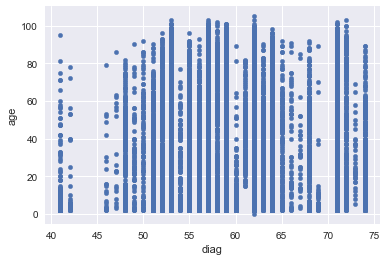

In [84]:
# For initial analysis plotted the scatter plot curve and drawn the correlation matrix
df_age.plot.scatter(x='diag',y='age')
df_age.corr()

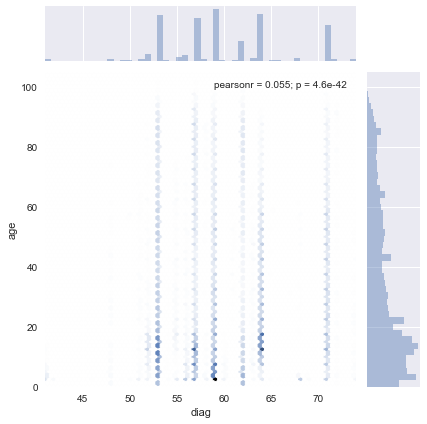

In [85]:
sns.jointplot(x='diag',y='age',data=df_age,kind= 'hex')

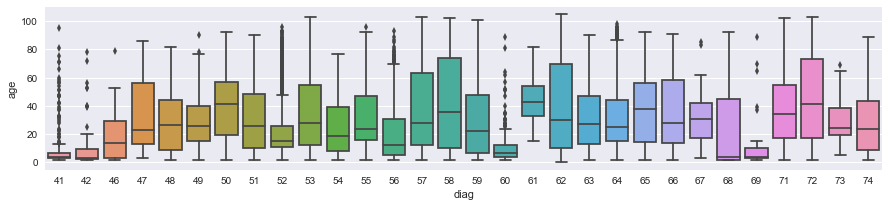

In [86]:
# The code displays the box plot between diagonis and age
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
sns.boxplot(x='diag',y='age',data=df_age,)

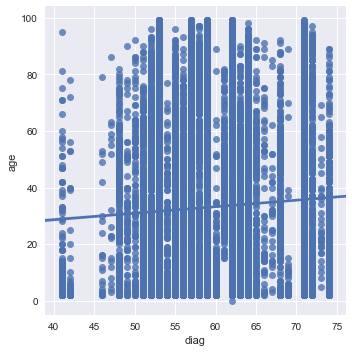

In [16]:
# plotted linear curve to see any relation
sns.lmplot(x='diag',y='age',data=df_age,palette='seismic')

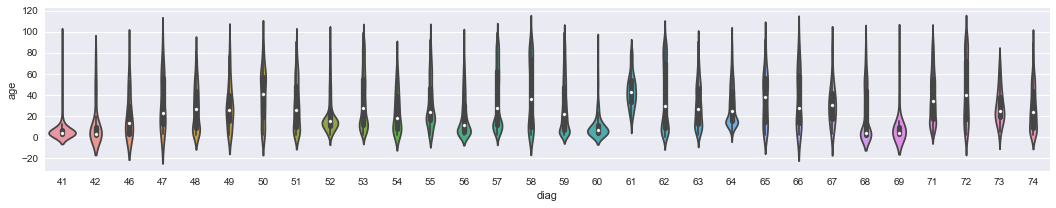

In [27]:
# Plotted to violinplot to gain further insight
plt.figure(figsize=(18,3))
sns.violinplot(x='diag',y='age',data=df_age)

In [31]:
# next few code is to gain further granular insight on the basis of diagnosis
df_age_58 = df_age[df_age['diag'] == 58]

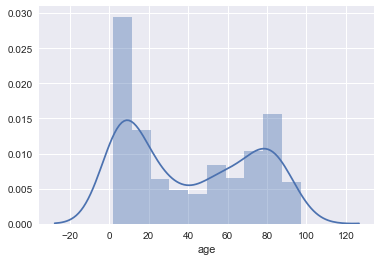

In [32]:
sns.distplot(df_age_58['age'],bins=10)

In [33]:
df_age_69 = df_age[df_age['diag'] == 69]

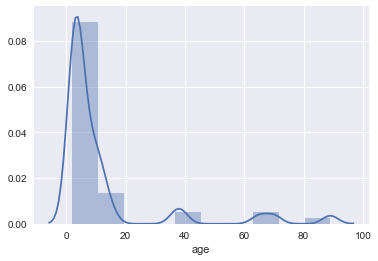

In [34]:
sns.distplot(df_age_69['age'],bins=10)

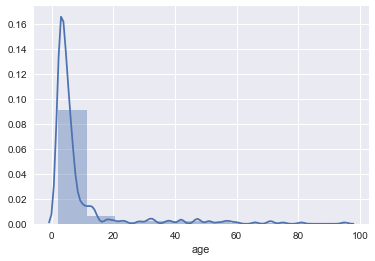

In [36]:
df_age_41 = df_age[df_age['diag'] == 41]
sns.distplot(df_age_41['age'],bins=10)

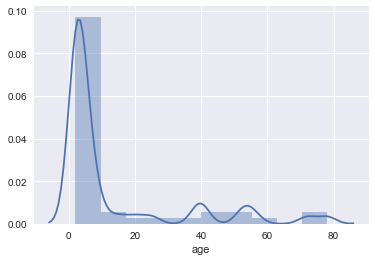

In [37]:
df_age_42 = df_age[df_age['diag'] == 42]
sns.distplot(df_age_42['age'],bins=10)

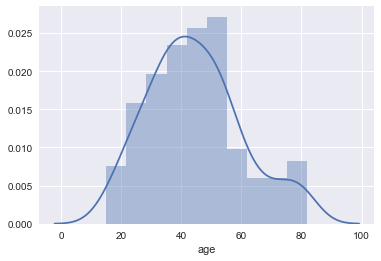

In [41]:
df_age_61 = df_age[df_age['diag'] == 61]
sns.distplot(df_age_61['age'],bins=10)